In [1]:
import warnings
warnings.filterwarnings('ignore')
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import os

In [2]:
data = {}
f =  open("Swallowed Earth.txt", "r", encoding="utf8")
data[0] = f.read()
data

{0: 'Swallowed Earth\nby Emerson R.C. Andrews\n\nIn the Benapole refugee camp, restless families stumbled through the oppressive haze of uncertainty. In the shadows of the border gates, Abir stood in line and collected his handful of rice and eighty takas from the border officials. He bought haleem and hand-rolled bidis on the way home. Border Security Forces roamed the dusty streets in military gear, occasionally stopping women and men dressed in hijab or topi. More people arrived every day. \nAbir saw Safina, dressed in her once-elegant green abaya, heading to the market. He looked her in the eyes and his stomach tightened. \n“Where are you going, my heart?” he asked.\nSafina intensified her gaze. “Where have you been, husband? There is a rally today! The phiringi BSF has not let anyone through in weeks.”\n“A rally? How can that help?”\n“Oh husband, sometimes you surprise me. If nothing changes, we will need to leave. Again. Food and water are running out. They can’t stop all of us.”

In [3]:
pd.set_option('max_colwidth',200)
df1 = pd.DataFrame.from_dict(data, orient = 'index')
df1 = df1.reset_index()
df1.columns = ['Chapters', 'Content']
df1

,Chapters,Content
0,0,"Swallowed Earth\nby Emerson R.C. Andrews\n\nIn the Benapole refugee camp, restless families stumbled through the oppressive haze of uncertainty. In the shadows of the border gates, Abir stood in l..."


In [4]:
import re
import string

def round1(text):
    #lower the Text
    text = text.lower()
    # Remove Numbers 
    text = re.sub(r"\d+", "", text)
    # Remove Symbols and special characters
    # ^\w return true if not alphanumereic 
    text = re.sub(r'[^\w]', ' ', text)
    # Remove more than a single whitespace 
    text = ' '.join(text.split())
    # Remove Leading and Trailing Whitespaces
    text = text.strip()
    return text
rnd1 = lambda x: round1(x)

In [5]:
df2 = df1.copy()
df2['Content'] = df2['Content'].apply(rnd1)
df2

,Chapters,Content
0,0,swallowed earth by emerson r c andrews in the benapole refugee camp restless families stumbled through the oppressive haze of uncertainty in the shadows of the border gates abir stood in line and ...


In [6]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

stopwords = nltk.corpus.stopwords.words('english')
t =['re','ve', 'em', 'll', 't', 's', 'don', 'ain', 'didn' ,'m' , 'wan', 'na' , 'la', 'gon', 'wan']

stopwords.extend(t)
stop = stopwords + list(string.punctuation)

def cleaning(text):
    clean_doc=[]
    for x in text:
        clean_sent=[]
        for i in word_tokenize(x):
        #for i in x.lower(): 
            if i not in stop:
                clean_sent.append(i) 
        clean_doc.append(clean_sent)
    return clean_doc 

In [7]:
df3 = df2.copy()
df3['Content'] = cleaning(df3['Content'])
df3

,Chapters,Content
0,0,"[swallowed, earth, emerson, r, c, andrews, benapole, refugee, camp, restless, families, stumbled, oppressive, haze, uncertainty, shadows, border, gates, abir, stood, line, collected, handful, rice..."


In [8]:
s = ' '
for i in range(len(df3)):
    df3['Content'].loc[i] = s.join(df3['Content'].loc[i])
df3

,Chapters,Content
0,0,swallowed earth emerson r c andrews benapole refugee camp restless families stumbled oppressive haze uncertainty shadows border gates abir stood line collected handful rice eighty takas border off...


In [9]:
from nltk.stem.wordnet import WordNetLemmatizer

wordnet = WordNetLemmatizer()
def Lemmatizing(text):
    pre_doc= []
    for word in text:
        pre_doc.append(wordnet.lemmatize(word))
    return pre_doc

In [10]:
df4 = df3.copy()
df4['Content'] = Lemmatizing(df4['Content'])
df4

,Chapters,Content
0,0,swallowed earth emerson r c andrews benapole refugee camp restless families stumbled oppressive haze uncertainty shadows border gates abir stood line collected handful rice eighty takas border off...


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
df5 = cv.fit_transform(df4['Content'])
df6 = pd.DataFrame(df5.toarray(), columns = cv.get_feature_names())
df6.index = df4['Chapters']
df6

,abandoned,abaya,ability,abir,abundant,accustomed,acesotech,adjacent,affairs,afternoon,...,work,world,worried,wound,wrapped,writhed,yanked,yelled,yellow,yellowed
Chapters,,,,,,,,,,,,,,,,,,,,,
0,8,1,1,10,1,1,1,1,1,3,...,2,2,3,1,4,1,2,2,1,1


In [12]:
df7= df6.transpose()
df7

Chapters,0
abandoned,8
abaya,1
ability,1
abir,10
abundant,1
...,...
writhed,1
yanked,2
yelled,2
yellow,1


In [13]:
top_dict= {}
for c in df7.columns:
    top = df7[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

In [14]:
for chapter, top_words in top_dict.items ():
    print(chapter)
    print(', '.join([word for word, count in top_words]))
    print('------------')

0
ava, nani, paban, water, guards, border, barikali, guard, grabbed, market, people, going, sandals, need, new, away, leave, metal, head, abir, eyes, think, ground, hand, refugees, body, big, camp, spot, turned
------------


In [15]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for i in df7.columns:
    top = [word for (word, count) in top_dict[i]]
    for t in top:
        words.append(t)
        
Counter(words).most_common()
add_stop_words = [word for word, count in Counter(words).most_common() if count > 0]
add_stop_words

['ava',
 'nani',
 'paban',
 'water',
 'guards',
 'border',
 'barikali',
 'guard',
 'grabbed',
 'market',
 'people',
 'going',
 'sandals',
 'need',
 'new',
 'away',
 'leave',
 'metal',
 'head',
 'abir',
 'eyes',
 'think',
 'ground',
 'hand',
 'refugees',
 'body',
 'big',
 'camp',
 'spot',
 'turned']

In [41]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


def wordcloud_gen(text,i):
    #msk = np.array(Image.open("mask.jpg"))
    # Create the wordcloud object
    wordcloud = WordCloud(#stopwords = add_stop_words,
                          #mask = msk,
                          width=1080, height=1080,
                          #width=480, height=480,
                          #max_words=100, 
                          min_font_size = 48,
                          #max_font_size = 480,
                          background_color="#0485d1", #white, grey, pink, skyblue
                          colormap="seismic", 
                          #Dark2, ocean, Accent, BuPu, PuBuGn, summer, Spectral,seismic
                          random_state=42).generate(text)
    
    #wordcloud.to_file( str(i)+ ".png")
    # Display the generated image:
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    return plt.show()

0


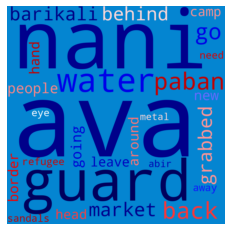

In [42]:
for i in range (len(df4)):
    print(df4["Chapters"].loc[i])
    wordcloud_gen(df4['Content'].loc[i],df4['Chapters'].loc[i])

In [18]:
def unique_words(text):
    a = text.split()
    return len(set(a))

unique_list = []
no_of_words = []
for i in range(len(df2)):
    length = unique_words(df2["Content"].loc[i])
    unique_list.append(length)
    words = len(df2["Content"].loc[i].split())
    no_of_words.append(words)
unique_list

[1374]

In [19]:
no_of_words

[5128]

In [20]:
df8 = pd.DataFrame(list(zip(unique_list, no_of_words)),
                   columns=['Unique Words','Total Words'])
df8["Ratio_TotalbyUnique"] = df8["Total Words"] / df8["Unique Words"]
df8.sort_index().round(2)

,Unique Words,Total Words,Ratio_TotalbyUnique
0,1374,5128,3.73
